In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall_customers = pd.read_csv('Mall_Customers.csv')
mall_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
mall_customers = mall_customers.drop(['CustomerID','Gender','Age'], axis=1) #KURUNG SIKU MENENTUKAN MULTIPLE COLUMS
mall_customers

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Data Analysis

Text(0.5, 0, 'Range pendapatan pertahun (k$)')

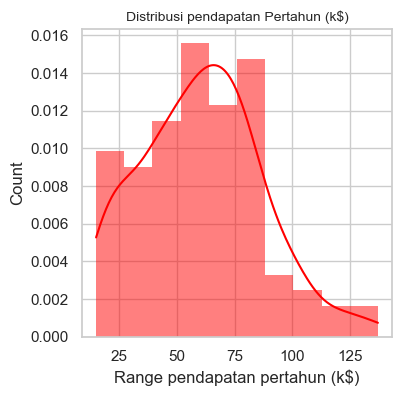

In [4]:
# cek distribusi kollom annual income #SNS.SETSTYLE
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(mall_customers['Annual Income (k$)'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pendapatan Pertahun (k$)', fontsize=10)
plt.ylabel('Count')
plt.xlabel('Range pendapatan pertahun (k$)')

Text(0.5, 0, 'Range Pengeluaran (k$)')

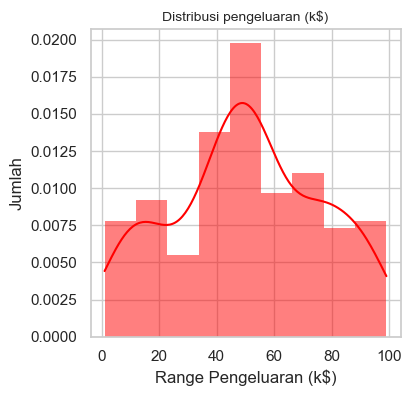

In [5]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(mall_customers['Spending Score (1-100)'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi pengeluaran (k$)', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('Range Pengeluaran (k$)')

## Clustering

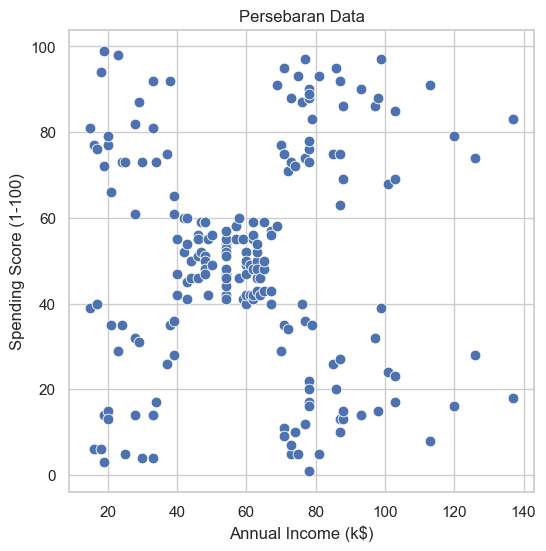

In [6]:
# Persebaran Data
plt.figure(figsize=(6,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',data = mall_customers, s = 60)
plt.title('Persebaran Data')
plt.show()

In [7]:
!pip install --upgrade scikit-learn

In [8]:
# hitung within cluster sum of squared arror (WCSS) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for  i in range (1, 15):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(mall_customers)
    wcss.append(kmModel.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wi

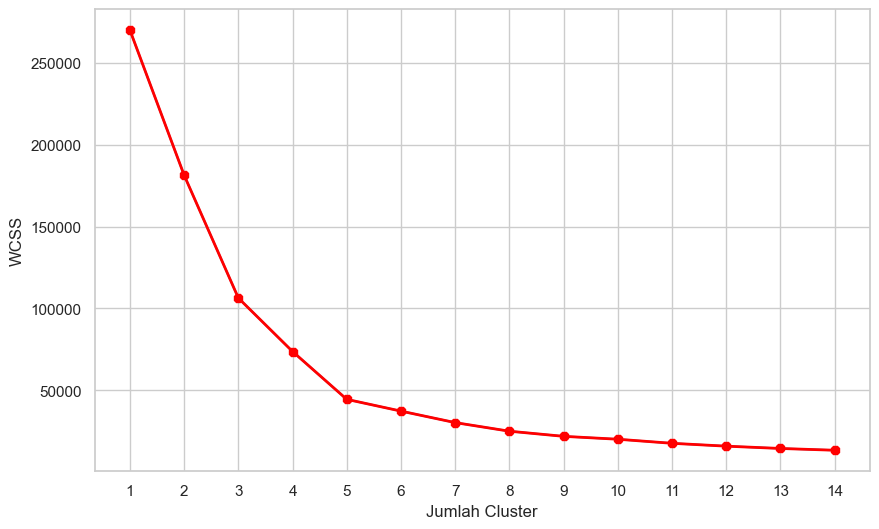

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), wcss)
plt.plot(range(1,15), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

In [10]:
# model dengan 5 cluster
kmModelFix = KMeans(n_clusters=5, n_init=10)
kmModelFix.fit(mall_customers)

#memprediksi  model
hasil_prediksi = kmModelFix.predict(mall_customers)
print(hasil_prediksi)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [11]:
mall_customers['Label'] = hasil_prediksi
mall_customers.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


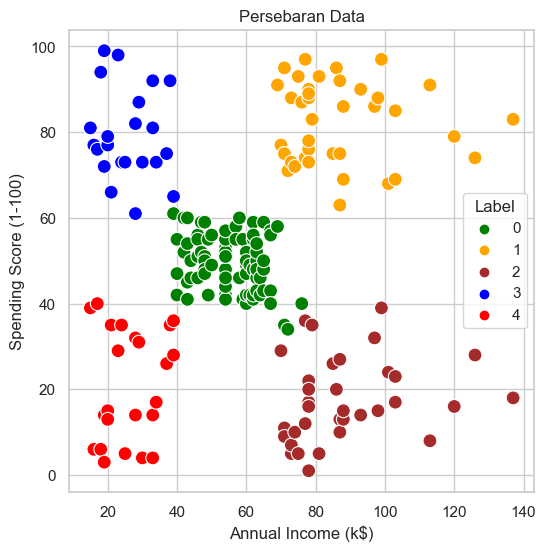

In [12]:
# persebaran Data beserta Labelnya
plt.figure(figsize=(6,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Label',
               palette=['green','orange','brown','blue','red'], legend='full',
               data = mall_customers, s = 100)
plt.title('Persebaran Data')
plt.show()

### kesimpulan
1. label 0 = orang yang terdapat di label satu, memiliki pendapatan sedang dan pengeluaran sedang
2. label 1 =  orang yang terdapat di label satu, memiliki pendapatan tinggi dan pengeluaran tinggi
3. label 2 =  orang yang terdapat di label satu, memiliki pendapatan rendah dan pengeluaran tinggi
4. label 3 =  orang yang terdapat di label satu, memiliki pendapatan tinggi dan pengeluaran rendah
5. label 4 =  orang yang terdapat di label satu, memiliki pendapatan rendah dan pengeluaran rendah